https://www.kaggle.com/kaggle/sf-salaries

# Домашнее задание:

## 1) Получить набор данных в соответствии с тем, что указан в списке ДЗ;

In [1]:
import numpy as np
import pandas as pd

In [2]:
salaries = pd.read_csv('Salaries.csv', index_col=0)
salaries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148654 entries, 1 to 148654
Data columns (total 12 columns):
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148049 non-null object
OvertimePay         148654 non-null object
OtherPay            148654 non-null object
Benefits            112495 non-null object
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              38119 non-null object
dtypes: float64(3), int64(1), object(8)
memory usage: 14.7+ MB


//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
def transform_df(df, columns):
    for column in columns:
        df[column] = map(lambda r: None if r is None or r == u'Not Provided' else float(r), df[column])
    return df

In [4]:
to_transform = [u'BasePay', u'OvertimePay', u'OtherPay', u'Benefits']
to_drop = [u'EmployeeName', u'Notes', u'Agency', u'Status']
salaries = transform_df(salaries, to_transform).drop(to_drop, 1).dropna()

In [5]:
salaries.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,111886.000000,111886.000000,111886.000000,111886.000000,111886.000000,111886.000000,111886.000000
mean,67207.558425,5266.322389,3654.897644,25114.344510,76128.778458,101243.122968,2013.012093
std,43417.689463,11764.540181,8038.682219,15372.790545,51269.681584,65248.814471,0.818020
min,-166.010000,-0.010000,-7058.590000,-13.800000,-618.130000,-618.130000,2012.000000
25%,33644.427500,0.000000,0.000000,12143.155000,37041.205000,49674.847500,2012.000000
50%,65547.035000,0.000000,820.630000,28697.845000,72628.810000,101967.740000,2013.000000
75%,95229.030000,4865.052500,4307.017500,35608.617500,107530.010000,142991.082500,2014.000000
max,319275.010000,220909.480000,342802.630000,96570.660000,471952.640000,510732.680000,2014.000000


## 2) Описать маржинальное распределение переменных, построить график распределения;

In [6]:
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [7]:
%matplotlib inline

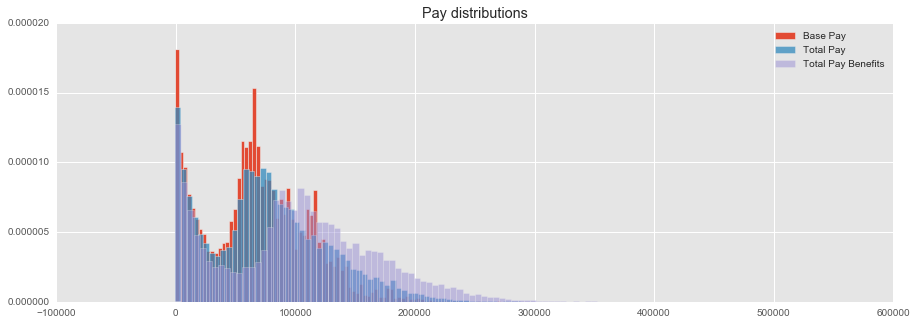

In [8]:
plt.figure(figsize=(15,5))
plt.hist(salaries.BasePay, bins=100, normed=True, alpha=1.0, label=u'Base Pay')
plt.hist(salaries.TotalPay, bins=100, normed=True, alpha=0.75, label=u'Total Pay')
plt.hist(salaries.TotalPayBenefits, bins=100, normed=True, alpha=0.5, label=u'Total Pay Benefits')
plt.legend(loc='upper right')
plt.title(u'Pay distributions')
plt.show()

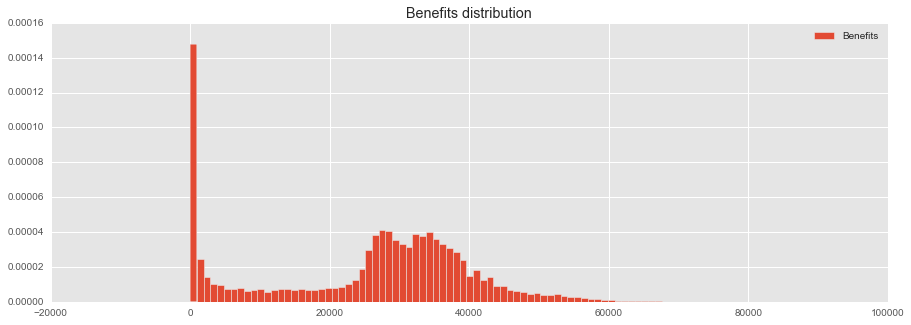

In [9]:
plt.figure(figsize=(15,5))
plt.hist(salaries.Benefits, bins=100, normed=True, alpha=1.0, label=u'Benefits')
plt.legend(loc='upper right')
plt.title(u'Benefits distribution')
plt.show()

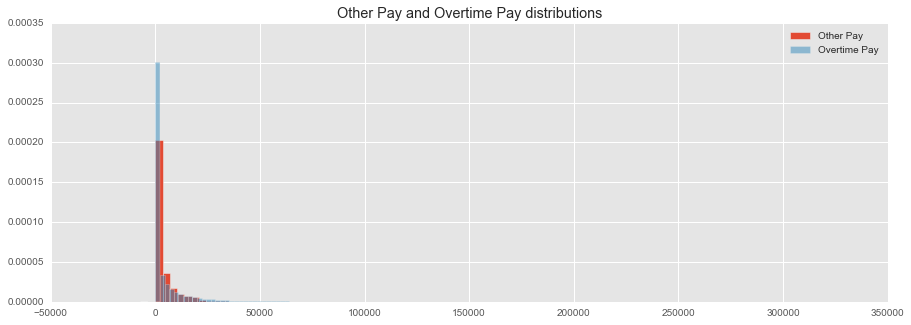

In [10]:
plt.figure(figsize=(15,5))
plt.hist(salaries.OtherPay, bins=100, normed=True, alpha=1.0, label=u'Other Pay')
plt.hist(salaries.OvertimePay, bins=100, normed=True, alpha=0.5, label=u'Overtime Pay')
plt.legend(loc='upper right')
plt.title(u'Other Pay and Overtime Pay distributions')
plt.show()

## 3) Построить матрицу корреляции, проверить значения коэффициентов на значимость;

In [11]:
from math import sqrt
from scipy import stats

In [12]:
var_columns = [u'TotalPay', u'TotalPayBenefits', u'BasePay', u'OvertimePay', u'OtherPay', u'Benefits']
corr_coefs = np.empty((len(var_columns), len(var_columns)))
for i in range(len(var_columns)):
    corr_coefs[i,i] = 1
    for j in range(i+1, len(var_columns)):
        corr_coefs[i,j] = corr_coefs[j,i] = stats.pearsonr(salaries[var_columns[i]], salaries[var_columns[j]])[0]
corr_df = pd.DataFrame(corr_coefs, columns=var_columns, index=var_columns)
print "Pearson correlation matrix:"
corr_df.head(6)

Pearson correlation matrix:


,TotalPay,TotalPayBenefits,BasePay,OvertimePay,OtherPay,Benefits
TotalPay,1.000000,0.993886,0.954802,0.513834,0.468902,0.883392
TotalPayBenefits,0.993886,1.000000,0.966532,0.474350,0.424339,0.929734
BasePay,0.954802,0.966532,1.000000,0.277212,0.282814,0.918028
OvertimePay,0.513834,0.474350,0.277212,1.000000,0.316429,0.299665
OtherPay,0.468902,0.424339,0.282814,0.316429,1.000000,0.237247
Benefits,0.883392,0.929734,0.918028,0.299665,0.237247,1.000000


##### t-критерий для оценки статистической значимости корреляционной связи

In [13]:
def significance_test(r, n, t_table):
    t_new = abs(r)*sqrt(n-2)/sqrt(1-r**2)
    return t_new > t_table

In [14]:
significance = 0.05
t_table = stats.t.ppf(1 - significance, len(salaries) - 1)
for i in range(len(var_columns)):
    for j in range(i+1, len(var_columns)):
        test = significance_test(corr_coefs[i,j], n=len(salaries), t_table=t_table)
        print "Correlation coef: %.5f, significance test: %s, %s & %s" % \
            (corr_coefs[i,j], 'OK' if test else 'False', var_columns[i], var_columns[j])

Correlation coef: 0.99389, significance test: OK, TotalPay & TotalPayBenefits
Correlation coef: 0.95480, significance test: OK, TotalPay & BasePay
Correlation coef: 0.51383, significance test: OK, TotalPay & OvertimePay
Correlation coef: 0.46890, significance test: OK, TotalPay & OtherPay
Correlation coef: 0.88339, significance test: OK, TotalPay & Benefits
Correlation coef: 0.96653, significance test: OK, TotalPayBenefits & BasePay
Correlation coef: 0.47435, significance test: OK, TotalPayBenefits & OvertimePay
Correlation coef: 0.42434, significance test: OK, TotalPayBenefits & OtherPay
Correlation coef: 0.92973, significance test: OK, TotalPayBenefits & Benefits
Correlation coef: 0.27721, significance test: OK, BasePay & OvertimePay
Correlation coef: 0.28281, significance test: OK, BasePay & OtherPay
Correlation coef: 0.91803, significance test: OK, BasePay & Benefits
Correlation coef: 0.31643, significance test: OK, OvertimePay & OtherPay
Correlation coef: 0.29967, significance tes

## 4) Сформулировать априорную гипотезу, пример:

- университеты: отличается ли доход университетов из топ-25 от остальных?
- титаник: выжило ли пассажиров в первом классе больше (доля), нежели чем в третьем?
- з/п в СФ: является ли з/п менеджера более высокой, нежели у "рядового" сотрудника; (скрипт для определения "менеджера")
- еда: склонна ли некая страна к потреблению менее "нездоровой" (с большим содержанием углеводов) пищи (скрипт для определения страны)?

### Гипотеза:
#### Отличается ли средняя зарплата профессии1 и профессии2?
$$ H_0: \mu_1 = \mu_2.$$
$$ H_1: \mu_1 \ne \mu_2.$$
#### Список подготовленных профессий: $manager, clerk, analyst, supervisor, assistant, chief, officer, accountant, engineer, mechanic, inspector, specialist, technician$

In [15]:
import sys
import unicodedata
import string
TRANSLATE_PUNCTUATION = dict.fromkeys(i for i in xrange(sys.maxunicode) if \
                                      not unicodedata.category(unichr(i)).startswith('L'))

def parse_text_field(input_str, encoding='utf-8'):
    if isinstance(input_str, bytes):
        input_str = input_str.decode(encoding)
    string_parsed = input_str.translate(TRANSLATE_PUNCTUATION)
    return string_parsed.lower()

def filter_job_position(input_str, positions):
    input_str = parse_text_field(input_str)
    for pos in positions:
        if pos in input_str: return pos
    return None
        
m_positions = [u'manager', u'clerk', u'analyst', u'supervisor', u'assistant', u'chief', u'officer',\
               u'accountant', u'engineer', u'mechanic', u'inspector', u'specialist', u'technician']

In [16]:
salaries['mp'] = map(lambda x: filter_job_position(x, m_positions), salaries['JobTitle'])

In [17]:
for j in m_positions:
    print j, salaries.TotalPay[salaries.mp == j].mean()

manager 126919.405086
clerk 49321.4219048
analyst 83090.9830083
supervisor 94737.710094
assistant 56571.1344849
chief 186592.453673
officer 105149.319081
accountant 75909.1296761
engineer 103553.834535
mechanic 92353.6545293
inspector 105983.001482
specialist 94048.0002146
technician 58029.9087313


## 5) Проверить значимость сформулированной гипотезы.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [18]:
def hypothesis_significance(df, job_a, job_b, threshold = 0.05):
    a, b = get_independent_salaries(df, job_a, job_b)
    print "%s mean: %.5f" % (job_a, a.mean())
    print "%s mean: %.5f" % (job_b, b.mean())
    res = stats.ttest_ind(a, b)
    print res[1]
    return res[1] > threshold

In [19]:
def get_independent_salaries(df, job_a, job_b):
    return df.TotalPay[(df.mp == job_a) & (df.mp != job_b)], df.TotalPay[(df.mp == job_b) & (df.mp != job_a)]

#### Сравним зарплаты инженера и офицера и некоторых других, получим H0

In [20]:
print 'H0' if hypothesis_significance(salaries, u'engineer', u'officer', 0.05) else 'H1'

engineer mean: 103553.83453
officer mean: 105149.31908
0.0874038941913
H0


In [21]:
print 'H0' if hypothesis_significance(salaries, u'supervisor', u'mechanic', 0.05) else 'H1'

supervisor mean: 94737.71009
mechanic mean: 92353.65453
0.20240165848
H0


In [22]:
print 'H0' if hypothesis_significance(salaries, u'specialist', u'supervisor', 0.05) else 'H1'

specialist mean: 94048.00021
supervisor mean: 94737.71009
0.655790680681
H0


#### Но если посмотреть на механика и инженера, получим H1

In [23]:
print 'H0' if hypothesis_significance(salaries, u'engineer', u'mechanic', 0.05) else 'H1'

engineer mean: 103553.83453
mechanic mean: 92353.65453
2.66361367809e-12
H1


In [24]:
print 'H0' if hypothesis_significance(salaries, u'manager', u'chief', 0.05) else 'H1'

manager mean: 126919.40509
chief mean: 186592.45367
5.220776066e-82
H1


## 6) Возможно, сделать выводы...

При $ \alpha = 0.05 $ :

Средние значения зарплат $engineer$ и $officer$ близки, для них гипотеза $H0$ является значимой. Аналогично для профессий $mechanic$ и $supervisor$, $specialist$ и $supervisor$, $inspector$ и $officer$. А для профессий $engineer$ и $mechanic$, $manager$ и $chief$ и других выполняется гипотеза $H1$

Наиболее близки распределения зарплат $specialist$ и $supervisor$